# Supplemental Figure 6

## Caption
Comparison of two phosphorous annual load estimates, Dolan and Chapra [2012] (Dolan) and estimates used in this study calculated from observed discharge and tributary phosphorous concentration (WRTDS) for their overlapping years, A) 2007 and B) 2008. Cross-plot of Dolan and WRTDS estimates for each river in C) 2007 and D) 2008. In bottom right, root mean squared error (RMSE) and mean absolute deviation (MAD) for all rivers and with the Fox River excluded in parenthesis.

In [16]:
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['font.size']=12
rcParams['xtick.labelsize']=12
rcParams['ytick.labelsize']=12
rcParams['axes.labelsize']=12
rcParams['axes.titlesize']=14

import pandas as pd
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import AxesGrid

# Define functions
* rmsd : root mean squared error
* mad : mean absolute deviation

In [17]:
def rmsd(x, y):
    rmsd = np.sqrt( np.sum( (x - y)**2 )/len(x) )
    return rmsd

def mad(x, y):
    mad = np.sum( np.abs(x - y) / len(x) )
    return mad

# Load data

In [18]:
# Read data
dir_raw = '/Users/gloege/Documents/Projects/MITgcm-Michigan-Phosphorus/data/raw/'
df_dolan = pd.read_csv(f'{dir_raw}dolan_pload_1994_2008_MTyr.csv', index_col='river')
df_wrtds = pd.read_csv(f'{dir_raw}wrtds_pload_2007_2010_MTyr.csv', index_col='river')
df_wrtds_nf = df_wrtds[df_wrtds.index != 'Fox']
df_dolan_nf = df_dolan[df_dolan.index != 'Fox']

In [19]:
### Reindex to be consistent with other bar plots
df_dolan = df_dolan.reindex(["Sheboygan", "Milwaukee", "St Joseph", "Kalamazoo", "Grand", "Muskegon",
           "Pere Marquette", "Manistee", "Manistique", "Menominee", "Fox"])
df_wrtds = df_wrtds.reindex(["Sheboygan", "Milwaukee", "St Joseph", "Kalamazoo", "Grand", "Muskegon",
           "Pere Marquette", "Manistee", "Manistique", "Menominee", "Fox"])

# Generate plot

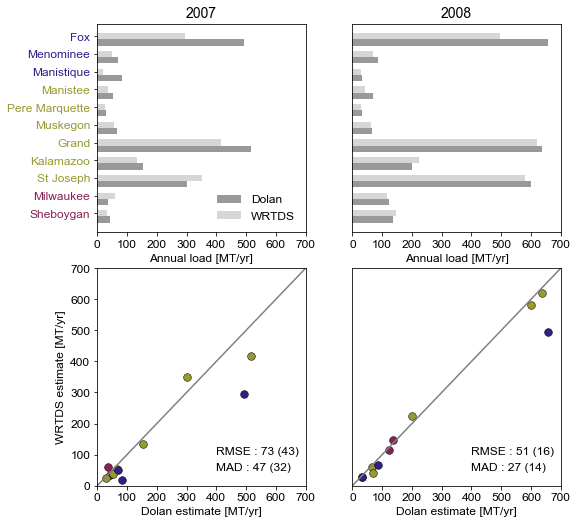

In [21]:
### ==============================================================
### Define grids
### ==============================================================
fig = plt.figure(figsize=(8.5,8.5))
grid = AxesGrid(fig, 111, 
                share_all=False,
                nrows_ncols = (2, 2),
                axes_pad = 0.5,
                aspect=False,
                cbar_mode="none",
                label_mode = '')  # note the empty label_mode

# Variables
n_rivers = 11
index = np.arange(n_rivers)
bar_width = 0.35
opacity = 0.8

### ==============================================================
### Generate bar plots
### ==============================================================
dolan2007 = grid[0].barh(index, df_dolan['pload2007'], bar_width,
                 alpha=opacity,
                 color=(0.5, 0.5, 0.5),
                 label='Dolan')
 
wrtds2007 = grid[0].barh(index + bar_width, df_wrtds['pload2007'], bar_width,
                 alpha=opacity,
                 color=(0.8, 0.8, 0.8),
                 label='WRTDS')

dolan2008 = grid[1].barh(index, df_dolan['pload2008'], bar_width,
                 alpha=opacity,
                 color=(0.5, 0.5, 0.5),
                 label='Dolan')
 
wrtds2008 = grid[1].barh(index + bar_width, df_wrtds['pload2008'], bar_width,
                 alpha=opacity,
                 color=(0.8, 0.8, 0.8),
                 label='WRTDS')

#### Set xTicks labels
plt.setp(grid[0], yticks=index + bar_width, 
         yticklabels=df_dolan.index,
         xlabel='Annual Load [MT]')
plt.setp(grid[0], title='2007')
plt.setp(grid[1], title='2008')

### Legend
leg = grid[0].legend(loc="lower right") 
leg.get_frame().set_linewidth(0.0)


### ==============================================================
### define colors
### ==============================================================
N = list(map(lambda x: x/255, [51, 31, 136]))
SE = list(map(lambda x: x/255, [153, 153, 51]))
SW = list(map(lambda x: x/255, [136, 34, 85]))

[t.set_color(i) for (i,t) in
 zip([SW,SW,SE,SE,SE,SE,SE,SE,N,N,N],grid[0].yaxis.get_ticklabels())]

[t.set_color(i) for (i,t) in
 zip([SW,SW,SE,SE,SE,SE,SE,SE,N,N,N],grid[1].yaxis.get_ticklabels())]

### ==============================================================
### Generate cross plots
### ==============================================================
for num, i in enumerate(df_dolan.index):
    # Set colors
    if (i=='Manistee' or \
        i=='Pere Marquette' or \
        i=='Muskegon' or \
        i=='Grand' or \
        i=='Kalamazoo' or \
        i=='St Joseph'):
        col = SE
    
    if (i=='Milwaukee' or i=='Sheboygan'):
        col = SW
        
    if (i=='Fox' or i=='Menominee' or i=='Manistique'):
        col = N
        
    # Plot scatter plots
    grid[2].scatter(df_dolan['pload2007'][num], df_wrtds['pload2007'][num],
                s = 60, 
                c = col, 
                edgecolors='k', 
                linewidth=0.5)
    grid[3].scatter(df_dolan['pload2008'][num], df_wrtds['pload2008'][num],
                s = 60, 
                c = col, 
                edgecolors='k', 
                linewidth=0.5)
    
### ==============================================================
### Make axes square
### ==============================================================
for ax in grid:
    # Set axes
    ax.set_xticks(np.arange(0, 800, 100))
    ax.set_xlim(0, 700)
    
    x0,x1 = ax.get_xlim()
    y0,y1 = ax.get_ylim()
    ax.set_aspect(abs(x1-x0)/abs(y1-y0))
    ax.get_position().bounds
    
### Set axes
grid[2].set_ylim(0, 700)
grid[2].set_yticks(np.arange(0, 800, 100))

# Add statistics 
rmsd2007 = rmsd(df_dolan['pload2007'], df_wrtds['pload2007'])
rmsd2007_nf = rmsd(df_dolan_nf['pload2007'], df_wrtds_nf['pload2007'])
rmsd2008 = rmsd(df_dolan['pload2008'], df_wrtds['pload2008'])
rmsd2008_nf = rmsd(df_dolan_nf['pload2008'], df_wrtds_nf['pload2008'])

mad2007 = mad(df_dolan['pload2007'], df_wrtds['pload2007'])
mad2007_nf = mad(df_dolan_nf['pload2007'], df_wrtds_nf['pload2007'])
mad2008 = mad(df_dolan['pload2008'], df_wrtds['pload2008'])
mad2008_nf = mad(df_dolan_nf['pload2008'], df_wrtds_nf['pload2008'])

grid[0].set_xlabel('Annual load [MT/yr]', fontsize=12)
grid[1].set_xlabel('Annual load [MT/yr]', fontsize=12)

grid[2].plot([0, 700],[0, 700],color=[0.5, 0.5, 0.5])
grid[2].axis([0, 700, 0, 700])
grid[2].set_xlabel('Dolan estimate [MT/yr]', fontsize=12)
grid[2].set_ylabel('WRTDS estimate [MT/yr]', fontsize=12)
#grid[2].set(adjustable='box-forced', aspect='equal')
### add stats
grid[2].text(400, 100, "RMSE : {0:.0f} ({1:.0f})".format(rmsd2007, rmsd2007_nf) , fontsize=12)
grid[2].text(400, 50, "MAD : {0:.0f} ({1:.0f})".format(mad2007, mad2007_nf) , fontsize=12)

grid[3].plot([0, 700],[0, 700],color=[0.5, 0.5, 0.5])
grid[3].axis([0, 700, 0, 700])
grid[3].set_xlabel('Dolan estimate [MT/yr]', fontsize=12)
grid[3].set_ylabel('WRTDS estimate [MT/yr]', fontsize=12)
#grid[3].set(adjustable='box-forced', aspect='equal')
grid[3].text(400, 100, "RMSE : {0:.0f} ({1:.0f})".format(rmsd2008, rmsd2008_nf) , fontsize=12)
grid[3].text(400, 50, "MAD : {0:.0f} ({1:.0f})".format(mad2008, mad2008_nf) , fontsize=12)

### remove y ticks from rightmost plots
grid[1].axes.get_yaxis().set_visible(False)
grid[3].axes.get_yaxis().set_visible(False)

